# Data Analysis

## Space Economy Real Value Added


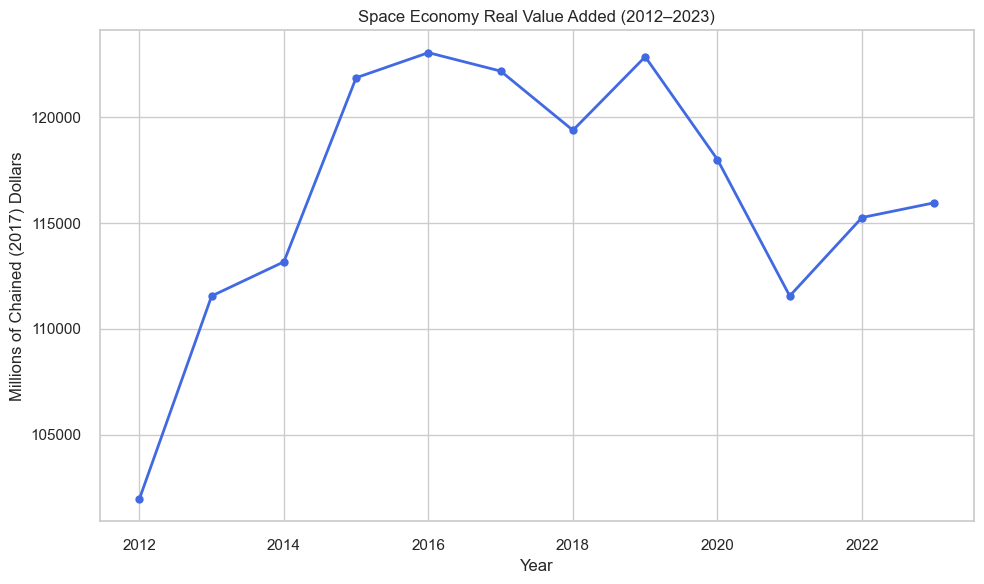

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/sanjanaholla/Downloads/CDC2025(Real Value Added by Industr (2)).csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
space_row = df[df['Industries'].str.contains('Space Economy', case=False, na=False)]
space_row.set_index('Industries', inplace=True)
space_data = space_row.T
space_data.columns = ['Space Economy']
space_data = space_data[space_data.index.str.match(r'^\d{4}$')]
space_data.index = space_data.index.astype(int)
space_data['Space Economy'] = pd.to_numeric(space_data['Space Economy'].astype(str).str.replace(',', ''), errors='coerce')

plt.figure(figsize=(10, 6))
plt.plot(space_data.index, space_data['Space Economy'], marker='o', linewidth=2, color='royalblue')
plt.title('Space Economy Real Value Added (2012–2023)')
plt.xlabel('Year')
plt.ylabel('Millions of Chained (2017) Dollars')
plt.grid(True)
plt.tight_layout()
plt.show()


# Real Value Added By Industry

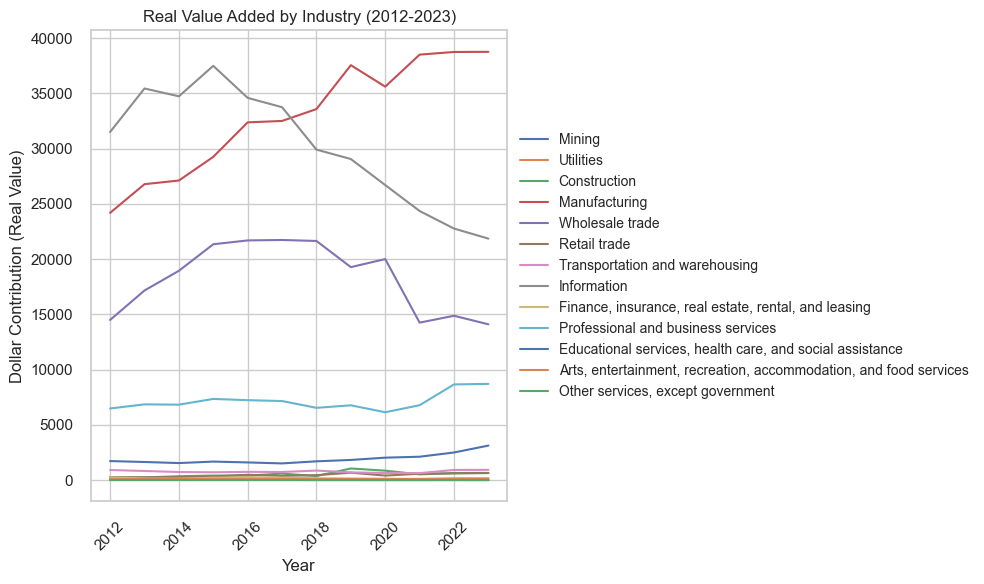

In [179]:
file_path = '/Users/sanjanaholla/Downloads/CDC2025(Real Value Added by Industry).csv'
df = pd.read_csv(file_path)
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df = df[df['Industries'].str.strip().str.lower() != 'total']

df['Industries'] = df['Industries'].str.strip()

year_cols = df.columns[1:]
for col in year_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')

df.dropna(subset=year_cols, how='all', inplace=True)
df.set_index('Industries', inplace=True)
df = df.T
df.index = df.index.astype(int)
plt.figure(figsize=(10, 6))
for industry in df.columns:
    plt.plot(df.index, df[industry], label=industry)

plt.title('Real Value Added by Industry (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Dollar Contribution (Real Value)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small', frameon=False)
plt.tight_layout()
plt.show()


# Employment By Industry

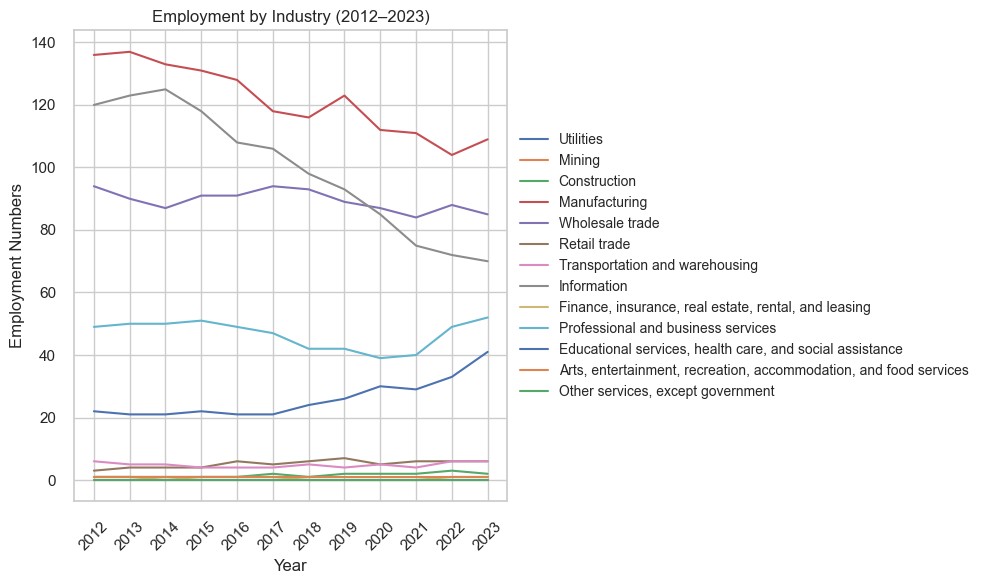

In [173]:
file_path = '/Users/sanjanaholla/Downloads/CDC2025(Table 7) (1).csv'
df = pd.read_csv(file_path, skiprows=1)

df.columns = ['Industry'] + [str(year) for year in range(2012, 2024)] + ['Extra1', 'Extra2']
df = df.drop(columns=['Extra1', 'Extra2'])

df['Industry'] = df['Industry'].str.strip()

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=df.columns[1:], how='all', inplace=True)

df.set_index('Industry', inplace=True)
df_transposed = df.T

plt.figure(figsize=(10, 6))
for industry in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[industry], label=industry)

plt.title('Employment by Industry (2012–2023)')
plt.xlabel('Year')
plt.ylabel('Employment Numbers')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small', frameon=False)
plt.tight_layout()
plt.show()


# Compensation of Employees By Industry

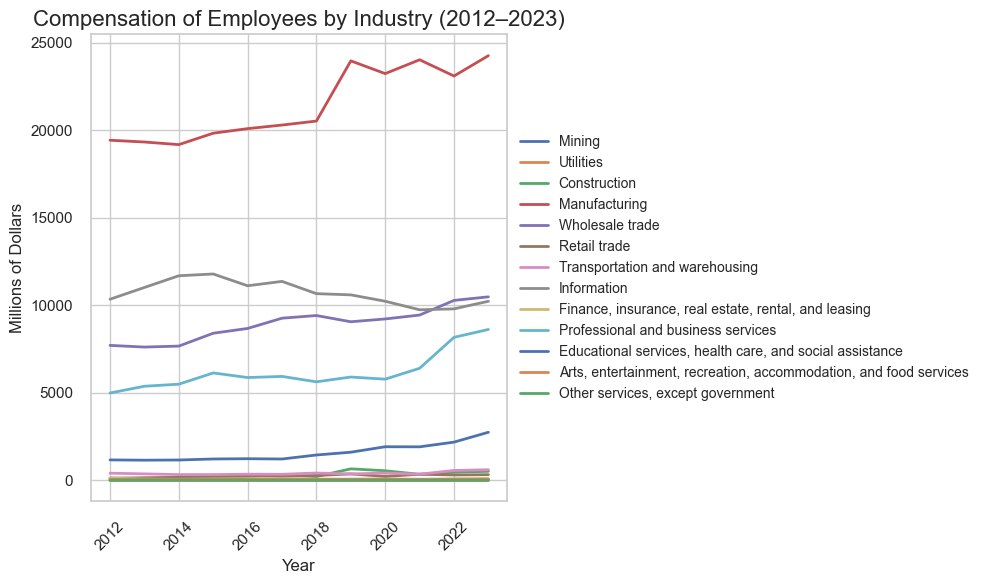

In [180]:
file_path = '/Users/sanjanaholla/Downloads/CDC2025(Compensation (fixed)) (1).csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

df = df[df['Industries'].str.lower().str.strip() != 'total']

df['Industries'] = df['Industries'].str.strip()

# Used Copilot to help covert year columns to numeric
year_cols = df.columns[1:]
for col in year_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')
df.dropna(subset=year_cols, how='all', inplace=True)

df.set_index('Industries', inplace=True)
df = df.T
df.index = df.index.astype(int)

plt.figure(figsize=(10, 6))
for industry in df.columns:
    plt.plot(df.index, df[industry], label=industry, linewidth=2)

plt.title('Compensation of Employees by Industry (2012–2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Millions of Dollars')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small', frameon=False)
plt.tight_layout()
plt.show()


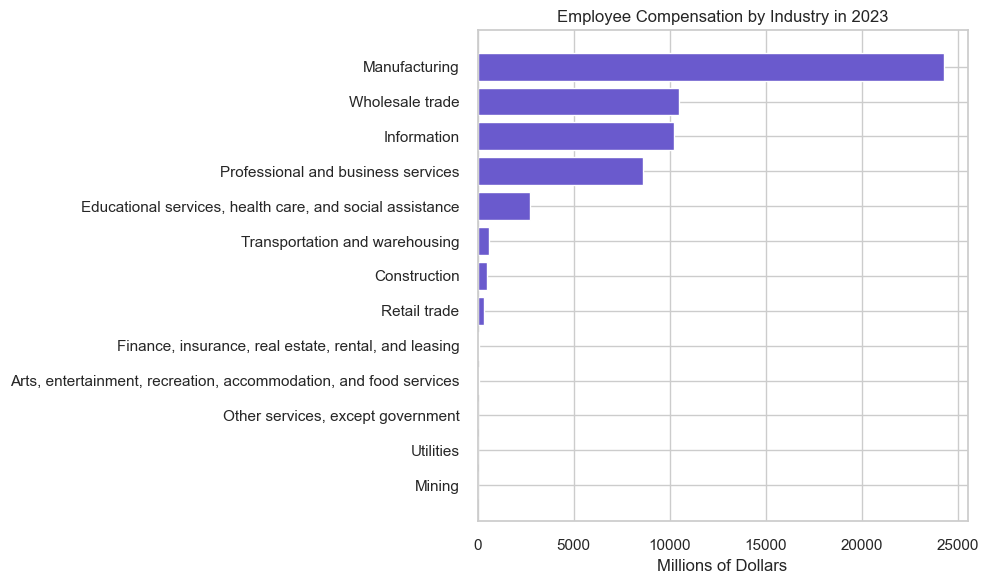

In [181]:
file_path = '/Users/sanjanaholla/Downloads/CDC2025(Compensation (fixed)) (1).csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df = df[df['Industries'].str.lower().str.strip() != 'total']
df['Industries'] = df['Industries'].str.strip()
df['2023'] = pd.to_numeric(df['2023'].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')
df_sorted = df.sort_values(by='2023', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Industries'], df_sorted['2023'], color='slateblue')
plt.title('Employee Compensation by Industry in 2023')
plt.xlabel('Millions of Dollars')
plt.tight_layout()
plt.show()

# Feature Correlation

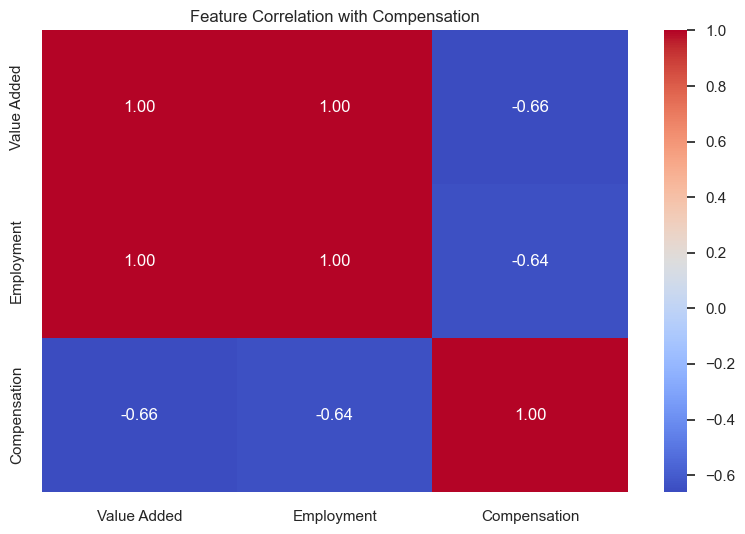

In [183]:
X_corr = X.copy()
X_corr['Compensation'] = y
corr = X_corr.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Compensation')
plt.tight_layout()
plt.show()